In [2]:
%matplotlib inline

import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import string
import collections

### Most common shapes

light        17872
triangle      8489
circle        8453
fireball      6562
unknown       6319
other         6247
disk          6005
sphere        5755
oval          4119
formation     2657
cigar         2241
changing      2140
flash         1472
rectangle     1418
cylinder      1382
diamond       1308
chevron       1007
egg            845
teardrop       817
cone           367
cross          265
delta            8
round            2
crescent         2
changed          1
pyramid          1
flare            1
hexagon          1
dome             1
Name: shape, dtype: int64


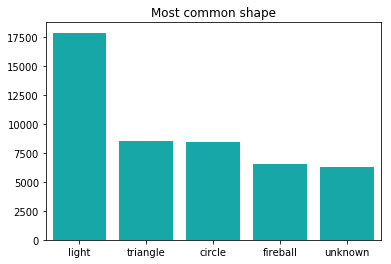

In [22]:
df = pd.read_csv("../data/shapes.csv", header=None, names=["shape"])

shape_counts = df['shape'].value_counts()
print(shape_counts)

temp = df['shape'].value_counts()[:5]
sns.barplot(temp.index, temp.values, color="c").set_title('Most common shape')

### Most common descriptions

In [23]:
c_df = pd.read_csv("../data/comments.csv", header=None, names=["comments"])
c_df.head()

,comments
0,This event took place in early fall around 194...
1,1949 Lackland AFB&#44 TX. Lights racing acros...
2,Green/Orange circular disc over Chester&#44 En...
3,My older brother and twin sister were leaving ...
4,AS a Marine 1st Lt. flying an FJ4B fighter/att...


In [12]:
# Object column into string
c_df['comments'] = c_df['comments'].astype(str)

# All to lower caps
c_df.comments = c_df.comments.apply(lambda x: x.lower())

# Remove punctuation
c_df['comments'] = c_df['comments'].str.replace('[^\w\s]','')

c_df.head()

,comments
0,this event took place in early fall around 194...
1,1949 lackland afb44 tx lights racing across t...
2,greenorange circular disc over chester44 england
3,my older brother and twin sister were leaving ...
4,as a marine 1st lt flying an fj4b fighterattac...


In [13]:
#Remove stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
c_df['comments'] = c_df['comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/deninc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#Stemmer
from __future__ import print_function
from nltk.stem import *
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
c_df['comments'] = c_df['comments'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

c_df.head()

,comments
0,event took place earli fall around 194950 occu...
1,1949 lackland afb44 tx light race across sky a...
2,greenorang circular disc chester44 england
3,older brother twin sister leav edna theater 9 ...
4,marin 1st lt fli fj4b fighterattack aircraft s...


In [15]:
# write to text file
file_comments = open("../data/ufo_comments_descriptions.txt", "w")
for row in c_df.itertuples(index=True, name='Pandas'):
    val = getattr(row, "comments")
    file_comments.write(val)
file_comments.close()

Read from text file that was made above, and do stuff

In [16]:
# Most common words
comments_df = pd.read_table("../data/ufo_comments_descriptions.txt", header=None)
comments_df.columns = ["comments"]

comments_most_common = collections.Counter(" ".join(comments_df["comments"].dropna()).split()).most_common(10)
print("Most common words in comments/descriptions:")
print(comments_most_common)

Most common words in comments/descriptions:
[('light', 31761), ('object', 16356), ('move', 12566), ('sky', 11543), ('shape', 9051), ('bright', 8286), ('white', 6427), ('orang', 5891), ('seen', 5588), ('fli', 5484)]


In [17]:
#tf/idf
from sklearn.feature_extraction.text import TfidfVectorizer

# Ignore too common terms (max_df = .25)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(comments_df['comments'])
# print(vectorizer.get_feature_names())

/usr/local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [18]:
# sort by means of words
comments_highest =  [vectorizer.get_feature_names()[id] for id in (-X.mean(axis=0).A).argsort()[0][:10]]
print("Comments highest score")
print(comments_highest)

Comments highest score
['light', 'object', 'move', 'sky', 'shape', 'bright', 'white', 'orang', 'seen', 'fli']


In [19]:
words = vectorizer.get_feature_names()
scores = pd.DataFrame({'word': words, 'pos': X[0].toarray()[0]})

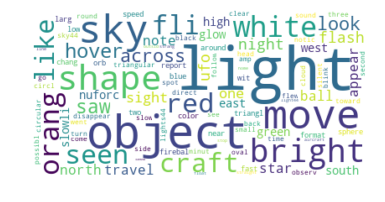

In [20]:
from wordcloud import WordCloud

def cloud(d):
    wc = WordCloud(background_color="white")
    wc.generate_from_frequencies(d)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

top_pos = scores.sort_values(by="pos", ascending=False).head(100)
cloud(dict(zip(top_pos.word, top_pos.pos)))